<a href="https://colab.research.google.com/github/Jng-su/deeplearning-deepface/blob/main/deepface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deepface

# Deepface 모델 선정 테스트

### 동일 인물 테스트 (모델별)

In [ ]:
from deepface import DeepFace
import numpy as np

# 이미지 경로 설정
image_path1 = "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (1).png"
image_path2 = "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (3).png"

# 사용하고자 하는 모델 리스트
models = [ "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID",  "ArcFace", "Dlib", "SFace", "GhostFaceNet" ]


for model_name in models:
    print(f'\n{"="*60}\n\nTesting model: {model_name}')

    try:
        # 두 이미지의 얼굴 임베딩을 계산
        embedding1 = DeepFace.represent(img_path=image_path1, model_name=model_name)[0]["embedding"]
        embedding2 = DeepFace.represent(img_path=image_path2, model_name=model_name)[0]["embedding"]

        # 임베딩 벡터의 코사인 유사도 계산
        cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

        # 유사도 출력
        print(f"Accuracy with {model_name}: {cosine_similarity}")

    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

print (f'\n{"="*60}')



Testing model: VGG-Face
Accuracy with VGG-Face: 0.42169308165259545


Testing model: Facenet
Accuracy with Facenet: 0.6695823012160905


Testing model: Facenet512
Accuracy with Facenet512: 0.714088025353527


Testing model: OpenFace
Accuracy with OpenFace: 0.7410807908389404


Testing model: DeepFace
Error with DeepFace: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.17. You need to downgrade your tf.


Testing model: DeepID
Accuracy with DeepID: 0.9387941131399796


Testing model: ArcFace
Accuracy with ArcFace: 0.7171648590651164


Testing model: Dlib
Error with Dlib: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-beuctiry/dlib_d4c8a811f6354ffabd110c6955cd796e/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version


Testing model: SFace
Accuracy with SFace: 0.517603535793028


Testing model: GhostFaceNet
Accuracy with GhostFaceNet: 0.5715056230584968

결과
- DeepID가 성능이 좋아보임 또는 facenet, facenet512
- 정확도는 각각 0.95 , 0.89, 0.89


### 다른 인물 테스트 (모델별)

In [ ]:
from deepface import DeepFace
import numpy as np

# 이미지 경로 설정
image_path1 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"
image_path2 = "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (2).png"

# 사용하고자 하는 모델 리스트
models = [ "VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID",  "ArcFace", "Dlib", "SFace", "GhostFaceNet" ]


for model_name in models:
    print(f'\n{"="*60}\n\nTesting model: {model_name}')

    try:
        # 두 이미지의 얼굴 임베딩을 계산
        embedding1 = DeepFace.represent(img_path=image_path1, model_name=model_name)[0]["embedding"]
        embedding2 = DeepFace.represent(img_path=image_path2, model_name=model_name)[0]["embedding"]

        # 임베딩 벡터의 코사인 유사도 계산
        cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

        # 유사도 출력
        print(f"Accuracy with {model_name}: {cosine_similarity}")

    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

print (f'\n{"="*60}')



Testing model: VGG-Face
Accuracy with VGG-Face: 0.042227660308056685


Testing model: Facenet
Accuracy with Facenet: -0.14278798182229493


Testing model: Facenet512
Accuracy with Facenet512: -0.20904862138952346


Testing model: OpenFace
Accuracy with OpenFace: 0.5802419424698372


Testing model: DeepFace
Error with DeepFace: DeepFace model requires LocallyConnected2D but it is no longer supported after tf 2.12 but you have 2.17. You need to downgrade your tf.


Testing model: DeepID
Accuracy with DeepID: 0.878178392076476


Testing model: ArcFace
Accuracy with ArcFace: -0.005570723053015217


Testing model: Dlib
Error with Dlib: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-__q6gnzd/dlib_8e35246b18d44028abb0e646a3c92032/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version


Testing model: SFace
Accuracy with SFace: 0.13198735337083142


Testing model: GhostFaceNet
Accuracy with GhostFaceNet: 0.061629

결과 : 예상과달리 DeepID의 성능이 이상함, facenet 혹은 facenet512 선택

# Deepface 라이브러리의 Facenet 사용

### 기준 이미지와 서로 다른 이미지들 비교 (임계값 0.80)

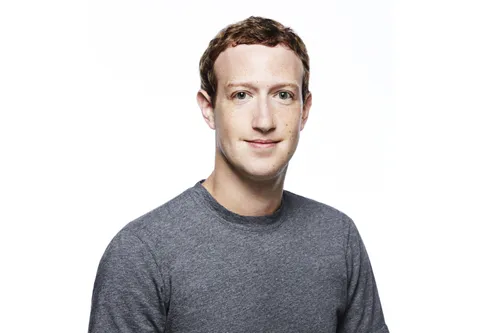


Comparing_image = Mark Zuckerberg (1).png


>>>>> Elon Musk (1).png <<<<<
Cosine Similarity: -0.076094
Match: False


>>>>> Mark Zuckerberg (2).png <<<<<
Cosine Similarity: 0.897455
Match: True


>>>>> Mark Zuckerberg (3).png <<<<<
Cosine Similarity: 0.827500
Match: True


>>>>> Benedict Cumberbatch (1).png <<<<<
Cosine Similarity: -0.045518
Match: False


>>>>> Benedict Cumberbatch (2).png <<<<<
Cosine Similarity: -0.142788
Match: False



In [ ]:
from deepface import DeepFace
import numpy as np
import os
from IPython.display import Image, display

compare_img = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"

display(Image(filename=compare_img))

compare_img_name = os.path.basename(compare_img)

print(f'{"=" * 60}\n\nComparing_image = {compare_img_name}\n\n{"=" * 60}')

temp_imgs = [
    "/content/drive/MyDrive/deepface/data/Elon Musk (1).png",
    "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (2).png",
    "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (3).png",
    "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (1).png",
    "/content/drive/MyDrive/deepface/data/Benedict Cumberbatch (2).png"
]

embedding_1 = DeepFace.represent(img_path=compare_img, model_name="Facenet")[0]["embedding"]

for img in temp_imgs:
    embedding_2 = DeepFace.represent(img_path=img, model_name="Facenet")[0]["embedding"]
    cosine_similarity = np.dot(embedding_1, embedding_2) / (np.linalg.norm(embedding_1) * np.linalg.norm(embedding_2))

    # 파일명 추출
    img_name = os.path.basename(img)

    print(f"\n>>>>> {img_name} <<<<<")
    print(f"Cosine Similarity: {cosine_similarity:.6f}")
    print(f"Match: {cosine_similarity > 0.80}")
    print(f'\n{"=" * 60}')

결과

- Accuracy 임계값을 0.95 이상으로 하고 싶지만 오차 범위가 생각보다 큼 -> 0.80로 줄임
- 동일 인물 및 다른 인물 비교 시 임계값 보다 확실하게 차이가 많이 남
  - 서로 다른 인물은 여유있게 비교 가능

<br>

추후 : 입력 이미지 전처리

- 해상도를 낮추고 테스트 실행 (해상도 관련 라이브러리)

  - 흑백 : 조명과 같은 색상 정보가 중요하지 않은 경우
  - 엣지 : 저해상도 및 노이즈가 많은 이미지
  - 블러 : 노이즈가 많은 이미지 (지양)
  - 리사이즈 : 계산 자원 절약, 하지만 얼굴 특징 가릴 경우 오차 증가

기존 이미지 vs 새로운 이미지 (블러, 엣지 ...)

### 얼굴 추출

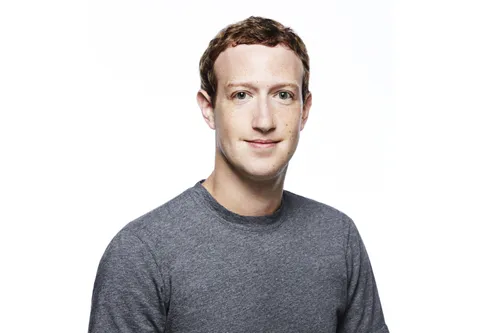

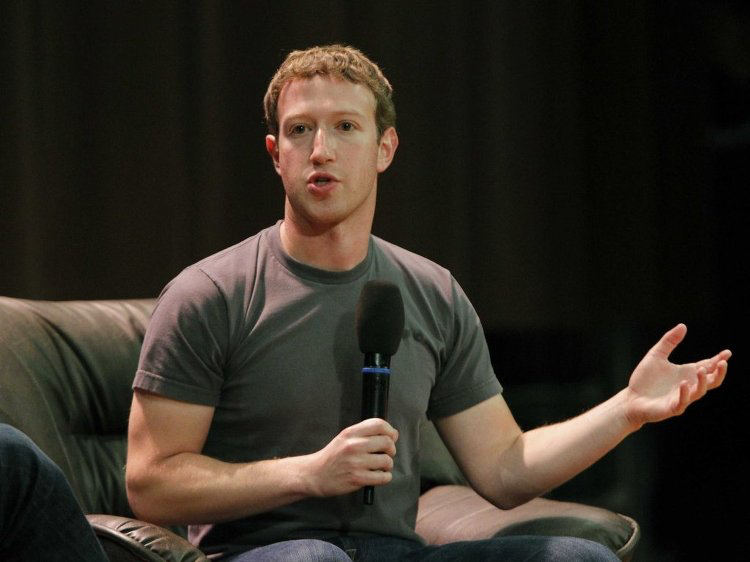


TestImgName1 = Mark Zuckerberg (1).png
TestImgName2 = Mark Zuckerberg (3).png

1/1 [==============================] - 0s 56ms/step


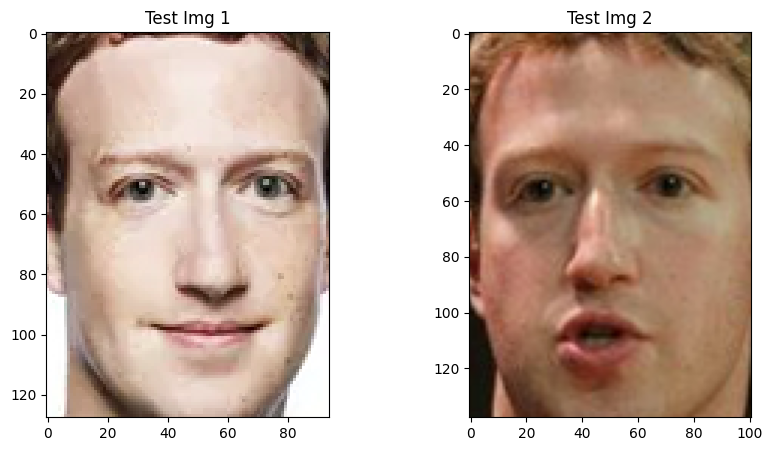

In [ ]:
from deepface import DeepFace
import numpy as np
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt

# 이미지 파일 경로
test_img1 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"
test_img2 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (3).png"

# 원본 이미지 표시
display(Image(filename=test_img1))
display(Image(filename=test_img2))

# 이미지 파일 이름 출력
compare_img_name1 = os.path.basename(test_img1)
compare_img_name2 = os.path.basename(test_img2)

print(f'{"=" * 60}\n\nTestImgName1 = {compare_img_name1}\nTestImgName2 = {compare_img_name2}\n\n{"=" * 60}')

#################################################################################

# 얼굴 추출
faces1 = DeepFace.extract_faces(img_path=test_img1, detector_backend="mtcnn")
faces2 = DeepFace.extract_faces(img_path=test_img2, detector_backend="mtcnn")

# 얼굴 이미지 표시
plt.figure(figsize=(10, 5))

if faces1:
    plt.subplot(1, 2, 1)
    plt.imshow(faces1[0]['face'])
    plt.axis('on')
    plt.title("Test Img 1")
else:
    print("No faces found in Image 1.")

if faces2:
    plt.subplot(1, 2, 2)
    plt.imshow(faces2[0]['face'])
    plt.axis('on')
    plt.title("Test Img 2")
else:
    print("No faces found in Image 2.")

# plt 결과 이미지 표시
plt.show()

Matplotlib : 파이썬 라이브러리 중 데이터를 시각화해주는 라이브러리

extract_faces : deepface 라이브러리 함수 중 하나로 얼굴만 추출

# 이미지 전처리 과정 테스트

### 기존 이미지와 블러 처리된 입력 이미지 비교

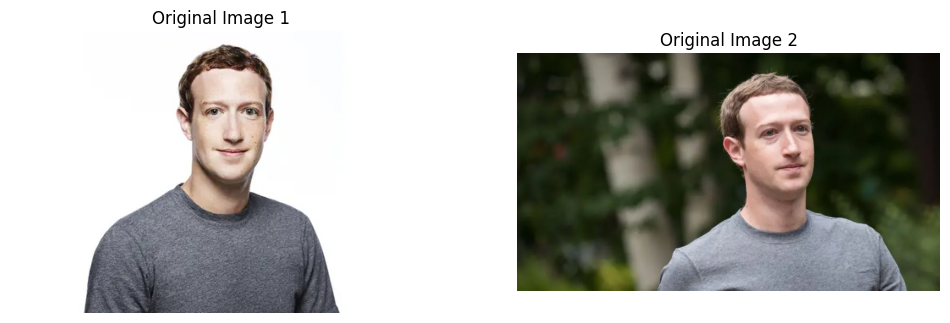

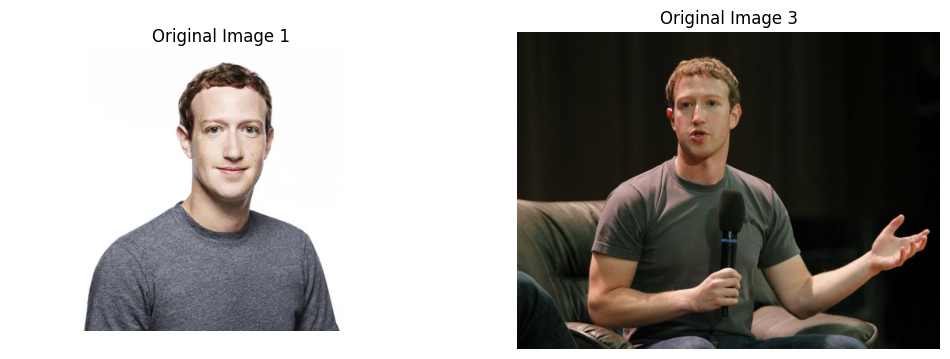



Testing model: Facenet
Cosine Similarity between Original Image 1 and Image 2: 0.897455
Cosine Similarity between Original Image 1 and Image 3: 0.827500




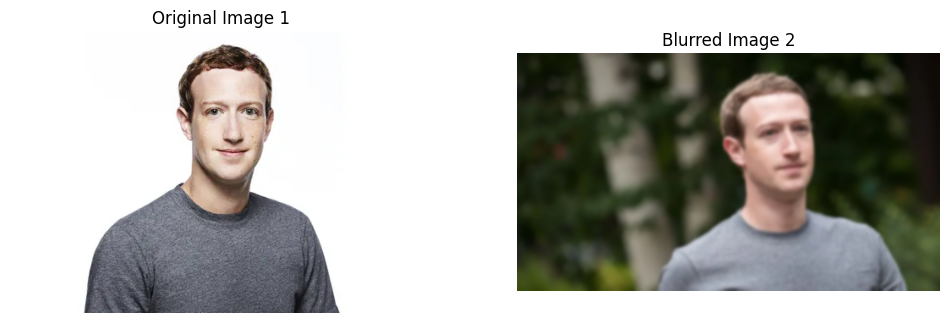

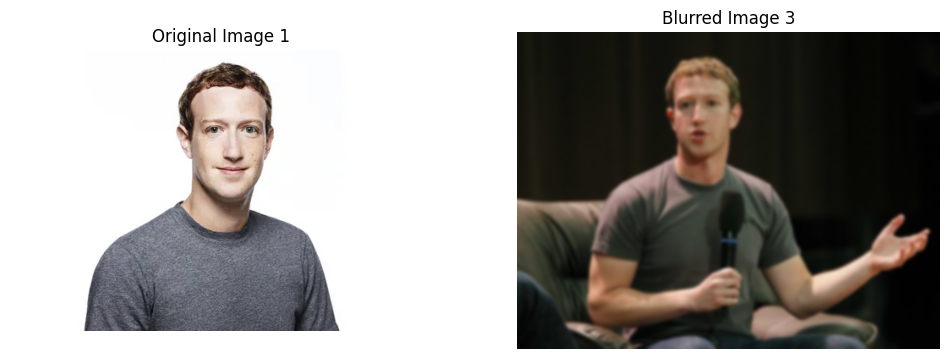



Testing model: Facenet
Cosine Similarity between Original Image 1 and Blurred Image 2: 0.864002
Cosine Similarity between Original Image 1 and Blurred Image 3: 0.528775


>>> (Original vs Image 2) - (Original vs Blurred Image 2): 0.033454
>>> (Original vs Image 3) - (Original vs Blurred Image 3): 0.298725



In [101]:
from deepface import DeepFace
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Blur
def apply_blur(image_path, output_path, ksize):
    image = cv2.imread(image_path)
    blurred_image = cv2.GaussianBlur(image, ksize, 0)
    cv2.imwrite(output_path, blurred_image)
    return blurred_image

# Embedding
def get_embedding(img_path, model_name):
    try:
        return DeepFace.represent(img_path=img_path, model_name=model_name, enforce_detection=False)[0]["embedding"]
    except Exception as e:
        print(f"Error processing {img_path} with {model_name}: {e}")
        return None

# Comparing images
def compare_images(img1_path, img2_path, model_name):
    embedding1 = get_embedding(img1_path, model_name)
    embedding2 = get_embedding(img2_path, model_name)

    if embedding1 is not None and embedding2 is not None:
        cosine_similarity = np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))
        return cosine_similarity
    else:
        print(f"Failed to extract embeddings with {model_name}.")
        return None

# Show Image
def show_images(image1, image2, title1, title2):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title(title1)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title(title2)
    plt.axis('off')

    plt.show()

# Facenet 모델 사용
model_name = "Facenet"

# 이미지 경로 설정
image_path1 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (1).png"
image_path2 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (2).png"
image_path3 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg (3).png"
blurred_image_path2 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg_blurred(2).png"
blurred_image_path3 = "/content/drive/MyDrive/deepface/data/Mark Zuckerberg_blurred(3).png"

# 블러 처리
blurred_image2 = apply_blur(image_path2, blurred_image_path2, ksize=(15, 15))
blurred_image3 = apply_blur(image_path3, blurred_image_path3, ksize=(15, 15))

# 원본 이미지 읽기
original_image1 = cv2.imread(image_path1)
original_image2 = cv2.imread(image_path2)
original_image3 = cv2.imread(image_path3)
blurred_image2 = cv2.imread(blurred_image_path2)
blurred_image3 = cv2.imread(blurred_image_path3)

# 이미지 시각화
show_images(original_image1, original_image2, "Original Image 1", "Original Image 2")
show_images(original_image1, original_image3, "Original Image 1", "Original Image 3")

print(f'\n{"="*60}\n\nTesting model: {model_name}')

cosine_similarity_original_vs_image2 = compare_images(image_path1, image_path2, model_name)
cosine_similarity_original_vs_image3 = compare_images(image_path1, image_path3, model_name)

if cosine_similarity_original_vs_image2 is not None:
    print(f"Cosine Similarity between Original Image 1 and Image 2: {cosine_similarity_original_vs_image2:.6f}")

if cosine_similarity_original_vs_image3 is not None:
    print(f"Cosine Similarity between Original Image 1 and Image 3: {cosine_similarity_original_vs_image3:.6f}")
else:
    print(f"Error comparing Original Image 1 and Image 3.")

print(f'\n{"="*60}\n')

show_images(original_image1, blurred_image2, "Original Image 1", "Blurred Image 2")
show_images(original_image1, blurred_image3, "Original Image 1", "Blurred Image 3")

print(f'\n{"="*60}\n\nTesting model: {model_name}')
cosine_similarity_original_vs_blurred2 = compare_images(image_path1, blurred_image_path2, model_name)
cosine_similarity_original_vs_blurred3 = compare_images(image_path1, blurred_image_path3, model_name)

if cosine_similarity_original_vs_blurred2 is not None:
    print(f"Cosine Similarity between Original Image 1 and Blurred Image 2: {cosine_similarity_original_vs_blurred2:.6f}")
else:
    print(f"Error comparing Original Image 1 and Blurred Image 2.")

if cosine_similarity_original_vs_blurred3 is not None:
    print(f"Cosine Similarity between Original Image 1 and Blurred Image 3: {cosine_similarity_original_vs_blurred3:.6f}")
else:
    print(f"Error comparing Original Image 1 and Blurred Image 3.")

print(f'\n{"="*60}\n')

# 두 유사도 차이 출력
if cosine_similarity_original_vs_image2 is not None and cosine_similarity_original_vs_blurred2 is not None:
    diff_image2 = cosine_similarity_original_vs_image2 - cosine_similarity_original_vs_blurred2
    print(f">>> (Original vs Image 2) - (Original vs Blurred Image 2): {diff_image2:.6f}")

if cosine_similarity_original_vs_image3 is not None and cosine_similarity_original_vs_blurred3 is not None:
    diff_image3 = cosine_similarity_original_vs_image3 - cosine_similarity_original_vs_blurred3
    print(f">>> (Original vs Image 3) - (Original vs Blurred Image 3): {diff_image3:.6f}")

print(f'\n{"="*60}')

결과

- 블러처리되면 기존이미지와 오차가 생김
- 임계값 조정 필요